In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from scipy.optimize import curve_fit

In [ ]:
%%capture --no-display
df_0405 = pd.read_csv('boxC/boxC_0405_r-fixed.csv')
df_0607 = pd.read_csv('boxA/boxA_0607_refined.csv')
df_0809 = pd.read_csv('boxD/boxD_0809_fixed_2.csv')
df_1011 = pd.read_csv('boxA/boxA_1011.csv')
df_1213 = pd.read_csv('boxD/boxD_1213.csv')
df_1415 = pd.read_csv('boxE/boxE_1415.csv')
df_1617 = pd.read_csv('boxC/boxC_1617.csv')

vims_wave = np.loadtxt('vims_wave.txt')

for df in (df_0405,df_0607,df_0809,df_1011,df_1213,df_1415,df_1617):
    for i in range(len(df['spectrum'])):
        df['spectrum'][i] = np.array([float(x) for x in df['spectrum'][i][1:-1].split(',')])


spectra_0405 = np.average(np.asarray(df_0405['spectrum']))
spectra_0607 = np.average(np.asarray(df_0607['spectrum']))
spectra_0809 = np.average(np.asarray(df_0809['spectrum']))
spectra_1011 = np.average(np.asarray(df_1011['spectrum']))
spectra_1213 = np.average(np.asarray(df_1213['spectrum']))
spectra_1415 = np.average(np.asarray(df_1415['spectrum']))
spectra_1617 = np.average(np.asarray(df_1617['spectrum']))

spectra_list = [spectra_0405,spectra_0607,spectra_0809,spectra_1011,spectra_1213,spectra_1415,spectra_1617]

In [ ]:
%matplotlib qt5
x = vims_wave
for spectra in spectra_list:
    y = spectra
    p = np.polyval(np.polyfit(x,y,8),x)
    plt.plot(vims_wave,spectra)
   # plt.plot(vims_wave,p,c='r')
plt.xlabel('Wavelength')
plt.ylabel('I/F')
plt.show()

In [ ]:
def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

### Define a function, with |A| & powerlaw based fit

In [29]:
def powerlaw(x, a, b):
    return a*np.power(x, b)

In [37]:
band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

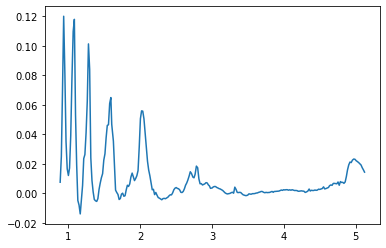

In [43]:
%matplotlib inline
x = vims_wave
y = spectra_0405

custom,_ = curve_fit(powerlaw,x[band_channels],y[band_channels],p0=[.15,-12]) #Only can have two #'s in array, powerlaw() only has 3 args

#plt.plot(x,y)
plt.plot(x,y-powerlaw(x,*custom))
plt.show()

In [47]:
print(list(enumerate(vims_wave))) #1.8 - 2.2 (56-81), fit gaussian to these values, do it for all of them!

[(0, 0.88421), (1, 0.90075), (2, 0.91692), (3, 0.93308), (4, 0.9498), (5, 0.96568), (6, 0.98226), (7, 0.99882), (8, 1.01479), (9, 1.03132), (10, 1.04755), (11, 1.06541), (12, 1.08183), (13, 1.09806), (14, 1.11396), (15, 1.13024), (16, 1.14695), (17, 1.1637), (18, 1.17996), (19, 1.19622), (20, 1.21246), (21, 1.22859), (22, 1.24492), (23, 1.26166), (24, 1.27813), (25, 1.29482), (26, 1.31091), (27, 1.32695), (28, 1.34324), (29, 1.35952), (30, 1.37695), (31, 1.39326), (32, 1.4094), (33, 1.42557), (34, 1.44184), (35, 1.45841), (36, 1.47514), (37, 1.49169), (38, 1.50794), (39, 1.52421), (40, 1.54035), (41, 1.55674), (42, 1.57361), (43, 1.59018), (44, 1.60228), (45, 1.62523), (46, 1.6416), (47, 1.65567), (48, 1.67238), (49, 1.68901), (50, 1.70536), (51, 1.72175), (52, 1.73802), (53, 1.75436), (54, 1.77105), (55, 1.78771), (56, 1.80401), (57, 1.82004), (58, 1.83616), (59, 1.85288), (60, 1.86933), (61, 1.88679), (62, 1.90261), (63, 1.91916), (64, 1.93545), (65, 1.95191), (66, 1.96871), (67, 1.9